In [ ]:
!pip install ace-tools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from datetime import datetime
import re
from datetime import datetime, timedelta
import random
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from datetime import timedelta
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DataMining/modularisasi/data/processed/cleaned_tokped_data.csv')

# Tampilkan semua nama kolom
print("Daftar kolom:")
print(df.columns.tolist())

# Cek info dasar dataset
print("\nInfo dataset:")
print(df.info())

# Cek 5 baris teratas
print("\nContoh data:")
print(df.head())

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())

Daftar kolom:
['Harga Produk', 'Jumlah Terjual', 'Jumlah Ulasan', 'Kategori', 'Nama Produk', 'Rating', 'Rating Produk', 'Tanggal Komentar', 'Teks Ulasan', 'Username', 'Panjang Ulasan (karakter)', 'Panjang Ulasan (kata)']

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Harga Produk               562 non-null    float64
 1   Jumlah Terjual             562 non-null    float64
 2   Jumlah Ulasan              562 non-null    float64
 3   Kategori                   562 non-null    int64  
 4   Nama Produk                562 non-null    object 
 5   Rating                     562 non-null    float64
 6   Rating Produk              562 non-null    float64
 7   Tanggal Komentar           562 non-null    object 
 8   Teks Ulasan                560 non-null    object 
 9   Username                   562 non-nul

In [7]:
terjual_bins = pd.qcut(df['Jumlah Terjual'], q=3, labels=['Low', 'Medium', 'High'])
# Rating Produk
rating_bins = pd.cut(df['Rating Produk'], bins=[0, 4.5, 4.8, 5], labels=['Low', 'Medium', 'High'])
# Panjang Ulasan
ulasan_bins = pd.qcut(df['Panjang Ulasan (kata)'], q=3, labels=['Short', 'Medium', 'Long'])

# Gabungkan jadi satu kategori pelanggan
def assign_customer_category(row):
    if row['terjual'] == 'High' and row['rating'] == 'High' and row['ulasan'] == 'Long':
        return 'Best'
    elif row['terjual'] == 'Low' and row['rating'] == 'Low' and row['ulasan'] == 'Short':
        return 'Low'
    else:
        return 'Average'

df['terjual'] = terjual_bins
df['rating'] = rating_bins
df['ulasan'] = ulasan_bins
df['Kategori Pelanggan'] = df.apply(assign_customer_category, axis=1)

# Hapus kolom bantu
df.drop(columns=['terjual', 'rating', 'ulasan'], inplace=True)

# Cek distribusi
print(df['Kategori Pelanggan'].value_counts())

# Pisahkan fitur dan target
X = df.drop(columns=['Kategori Pelanggan', 'Teks Ulasan', 'Username', 'Nama Produk', 'Tanggal Komentar'])
y = df['Kategori Pelanggan']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan ukuran dan distribusi
print("Data training:", X_train.shape, y_train.shape)
print("Data testing :", X_test.shape, y_test.shape)

print("\nDistribusi Train:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi Test:")
print(y_test.value_counts(normalize=True))

Kategori Pelanggan
Average    509
Best        44
Low          9
Name: count, dtype: int64
Data training: (449, 8) (449,)
Data testing : (113, 8) (113,)

Distribusi Train:
Kategori Pelanggan
Average    0.906459
Best       0.077951
Low        0.015590
Name: proportion, dtype: float64

Distribusi Test:
Kategori Pelanggan
Average    0.902655
Best       0.079646
Low        0.017699
Name: proportion, dtype: float64


In [8]:
df.head(10)

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Rating,Rating Produk,Tanggal Komentar,Teks Ulasan,Username,Panjang Ulasan (karakter),Panjang Ulasan (kata),Kategori Pelanggan
0,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-03-25 18:04:09.701257,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a,83,13,Average
1,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-07-07 18:04:09.701291,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i,56,10,Average
2,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-01-28 18:04:09.701298,"Ukuran pas, bahan lumayan",R***r,25,4,Average
3,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-09-16 18:04:09.701303,Menurut saya ini sangat jelek bahan panas,B***m,41,7,Average
4,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-03-27 18:04:09.701308,Kualitas produk: Bagus,B***t,22,3,Average
5,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-09-11 18:04:09.701313,bagus dan pas bgt,H***c,17,4,Average
6,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-05-09 18:04:09.701317,Nyaman,M***l,6,1,Average
7,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-11-17 18:04:09.701323,Barang bagus,D***i,12,2,Average
8,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2025-02-08 18:04:09.701329,Barang ok,W***l,9,2,Average
9,52.0,100.0,29.0,1,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,5.0,4.8,2024-12-19 18:04:09.701334,Sesuai harga☺,V***d,13,2,Average


In [12]:
now = df['Tanggal Komentar'].max() + pd.Timedelta(days=1)

# Hitung RFM per pelanggan (Username)
rfm = df.groupby('Username').agg({
    'Tanggal Komentar': lambda x: (now - x.max()).days,  # Recency
    'Jumlah Terjual': 'sum',                            # Frequency
    'Harga Produk': lambda x: (x * df.loc[x.index, 'Jumlah Terjual']).sum()  # Monetary
}).rename(columns={
    'Tanggal Komentar': 'Recency',
    'Jumlah Terjual': 'Frequency',
    'Harga Produk': 'Monetary'
})

# Beri skor (1 = rendah, 3 = tinggi)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1]).astype(int)  # makin kecil Recency makin bagus
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)

# Jumlahkan skor
rfm['RFM_Total'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Segmentasi 3 segmen berdasarkan skor total
def segment_customer(score):
    if score >= 8:
        return 'Best Customer'
    elif score >= 5:
        return 'Average'
    else:
        return 'Low Value'

rfm['Kategori Pelanggan'] = rfm['RFM_Total'].apply(segment_customer)

if 'Kategori Pelanggan' in df.columns:
    df = df.drop(columns=['Kategori Pelanggan'])

# Baru merge
df = df.merge(rfm[['Kategori Pelanggan']], on='Username')

# Cek distribusi
print(df['Kategori Pelanggan'].value_counts())

Kategori Pelanggan
Best Customer    267
Average          211
Low Value         84
Name: count, dtype: int64


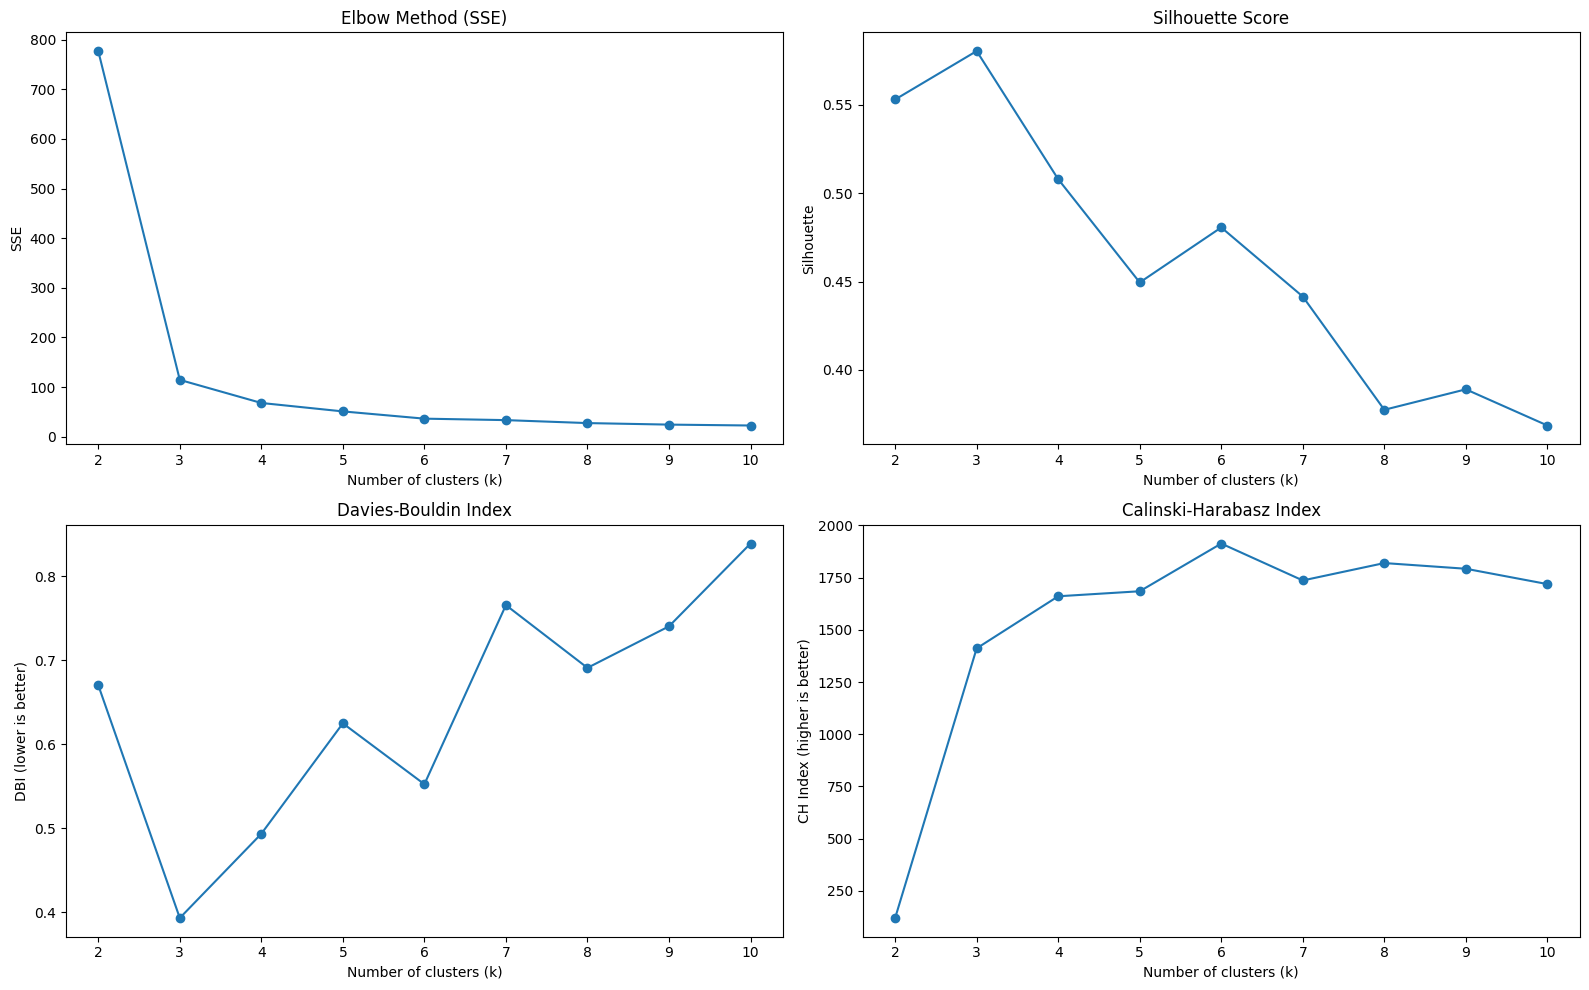

In [15]:
# Ambil data RFM (tanpa skor atau kategori)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Normalisasi data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Rentang nilai K yang akan diuji
k_values = range(2, 11)

# Simpan hasil untuk tiap metode
sse = []
silhouette = []
dbi = []
calinski = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled)
    labels = kmeans.labels_

    # Evaluasi
    sse.append(kmeans.inertia_)  # Elbow
    silhouette.append(silhouette_score(rfm_scaled, labels))
    dbi.append(davies_bouldin_score(rfm_scaled, labels))
    calinski.append(calinski_harabasz_score(rfm_scaled, labels))

# Plot learning curve
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')

plt.subplot(2, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')

plt.subplot(2, 2, 3)
plt.plot(k_values, dbi, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('DBI (lower is better)')

plt.subplot(2, 2, 4)
plt.plot(k_values, calinski, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Index (higher is better)')

plt.tight_layout()
plt.show()


📊 Median RFM per Klaster:
                Recency  Frequency   Monetary
Cluster_KMeans                               
0                  83.0      100.0    12480.0
1                 270.5       90.0     8400.0
2                   1.0    13868.0  1895448.0

📦 Jumlah pelanggan per klaster:
Cluster_KMeans
0    198
1    150
2      1
Name: count, dtype: int64


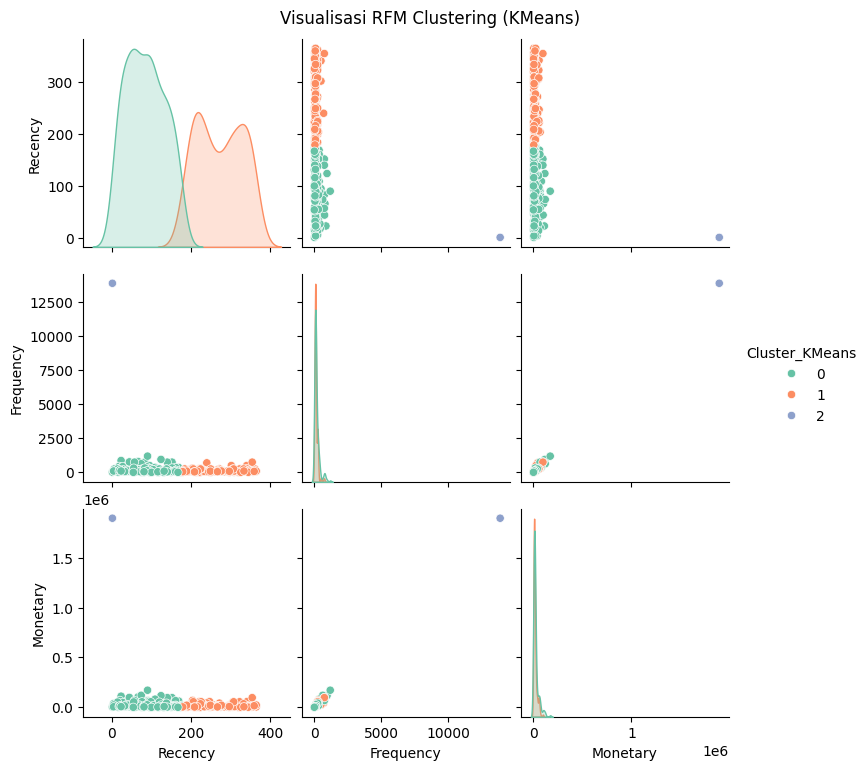

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(rfm_scaled)

# Tambahkan hasil klaster ke dataframe RFM
rfm['Cluster_KMeans'] = kmeans.labels_

# Statistik tiap klaster
cluster_summary = rfm.groupby('Cluster_KMeans')[['Recency', 'Frequency', 'Monetary']].median().round(2)
print("\n📊 Median RFM per Klaster:")
print(cluster_summary)

# Ukuran masing-masing klaster
print("\n📦 Jumlah pelanggan per klaster:")
print(rfm['Cluster_KMeans'].value_counts())

# Visualisasi klaster dengan pairplot
rfm_vis = rfm.copy()
rfm_vis['Cluster_KMeans'] = rfm_vis['Cluster_KMeans'].astype(str)  # agar warna berbeda

sns.pairplot(rfm_vis, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster_KMeans', palette='Set2')
plt.suptitle("Visualisasi RFM Clustering (KMeans)", y=1.02)
plt.show()


📊 Median RFM per Klaster (Agglomerative):
               Recency  Frequency   Monetary
Cluster_Agglo                               
0                268.0       90.0     8400.0
1                  1.0    13868.0  1895448.0
2                 82.0      100.0    12600.0

📦 Jumlah pelanggan per klaster (Agglo):
Cluster_Agglo
2    193
0    155
1      1
Name: count, dtype: int64


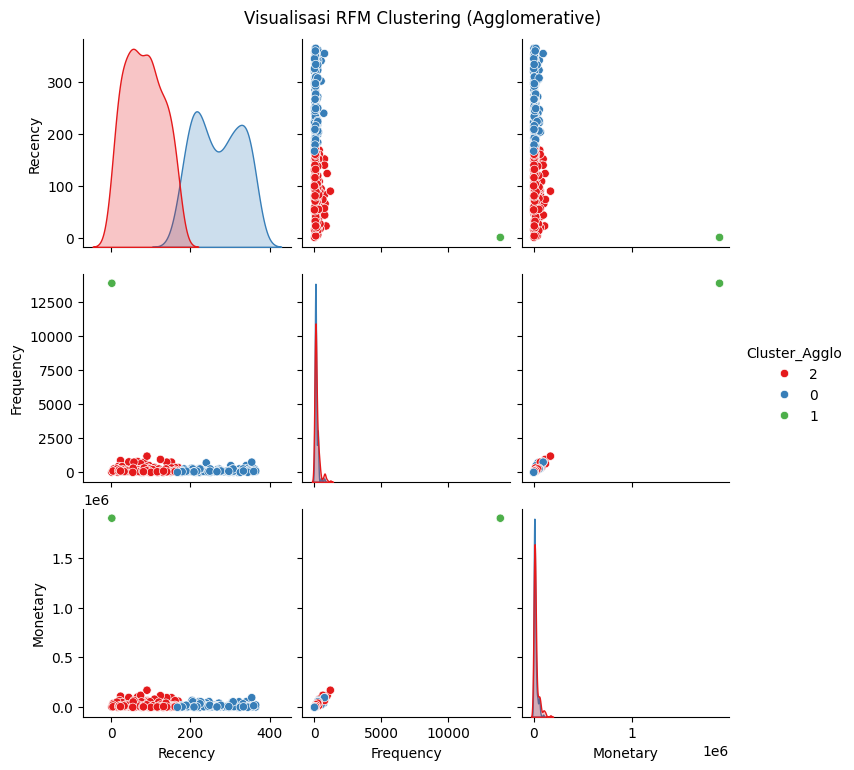

In [17]:
# Buat model Agglomerative
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
rfm['Cluster_Agglo'] = agglo.fit_predict(rfm_scaled)

# Statistik median tiap klaster
agglo_summary = rfm.groupby('Cluster_Agglo')[['Recency', 'Frequency', 'Monetary']].median().round(2)
print("\n📊 Median RFM per Klaster (Agglomerative):")
print(agglo_summary)

# Jumlah anggota tiap klaster
print("\n📦 Jumlah pelanggan per klaster (Agglo):")
print(rfm['Cluster_Agglo'].value_counts())

# Visualisasi Pairplot
rfm_vis = rfm.copy()
rfm_vis['Cluster_Agglo'] = rfm_vis['Cluster_Agglo'].astype(str)

sns.pairplot(rfm_vis, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster_Agglo', palette='Set1')
plt.suptitle("Visualisasi RFM Clustering (Agglomerative)", y=1.02)
plt.show()

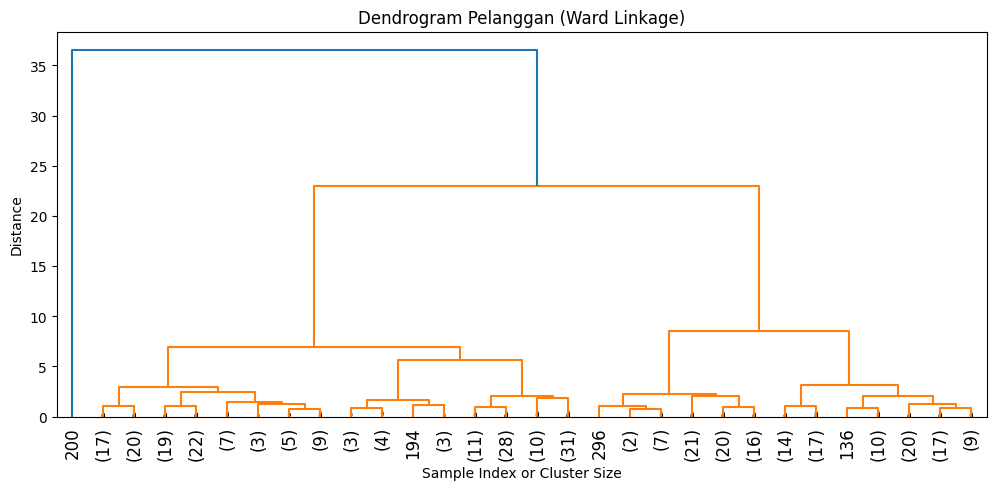

In [20]:
# Hitung linkage matrix untuk dendrogram
linked = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram Pelanggan (Ward Linkage)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()


📈 Silhouette Score KMeans       : 0.5804
📈 Silhouette Score Agglomerative: 0.5797

📦 Jumlah pelanggan per klaster (KMeans):
Cluster_KMeans
0    198
1    150
2      1
Name: count, dtype: int64

📦 Jumlah pelanggan per klaster (Agglo):
Cluster_Agglo
0    155
1      1
2    193
Name: count, dtype: int64

📊 Median RFM per Klaster (KMeans):
                 Recency  Frequency   Monetary
Cluster_KMeans                               
0                  83.0      100.0    12480.0
1                 270.5       90.0     8400.0
2                   1.0    13868.0  1895448.0

📊 Median RFM per Klaster (Agglo):
                Recency  Frequency   Monetary
Cluster_Agglo                               
0                268.0       90.0     8400.0
1                  1.0    13868.0  1895448.0
2                 82.0      100.0    12600.0

🔁 Cross-tab Klaster KMeans vs Agglo:
 Cluster_Agglo     0  1    2
Cluster_KMeans             
0                 5  0  193
1               150  0    0
2                 0 

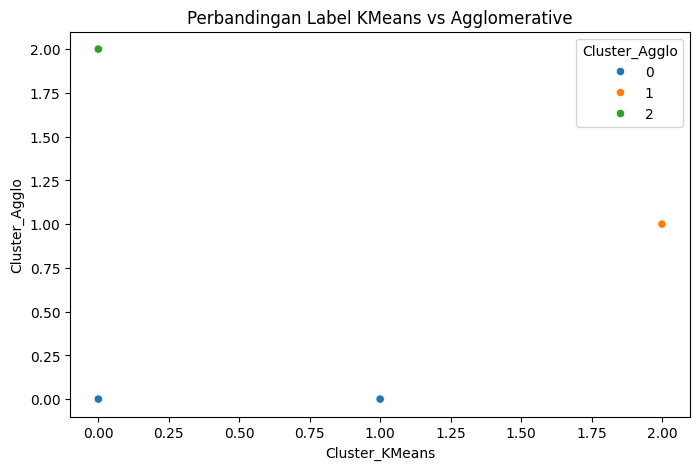

In [21]:
sil_kmeans = silhouette_score(rfm_scaled, rfm['Cluster_KMeans'])
sil_agglo = silhouette_score(rfm_scaled, rfm['Cluster_Agglo'])

print(f"\n📈 Silhouette Score KMeans       : {sil_kmeans:.4f}")
print(f"📈 Silhouette Score Agglomerative: {sil_agglo:.4f}")

# 2. Tabel perbandingan jumlah pelanggan
print("\n📦 Jumlah pelanggan per klaster (KMeans):")
print(rfm['Cluster_KMeans'].value_counts().sort_index())

print("\n📦 Jumlah pelanggan per klaster (Agglo):")
print(rfm['Cluster_Agglo'].value_counts().sort_index())

# 3. Tabel ringkasan median RFM tiap klaster
summary_kmeans = rfm.groupby('Cluster_KMeans')[['Recency', 'Frequency', 'Monetary']].median().round(2)
summary_agglo = rfm.groupby('Cluster_Agglo')[['Recency', 'Frequency', 'Monetary']].median().round(2)

print("\n📊 Median RFM per Klaster (KMeans):\n", summary_kmeans)
print("\n📊 Median RFM per Klaster (Agglo):\n", summary_agglo)

# 4. Crosstab antar model
cross = pd.crosstab(rfm['Cluster_KMeans'], rfm['Cluster_Agglo'])
print("\n🔁 Cross-tab Klaster KMeans vs Agglo:\n", cross)

# 5. Visualisasi silang klaster (scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Cluster_KMeans', y='Cluster_Agglo', data=rfm, hue='Cluster_Agglo', palette='tab10')
plt.title('Perbandingan Label KMeans vs Agglomerative')
plt.show()

In [24]:
kmeans_labels = rfm['Cluster_KMeans']
agglo_labels = rfm['Cluster_Agglo']

# 1. Silhouette Score
sil_kmeans = silhouette_score(rfm_scaled, kmeans_labels)
sil_agglo = silhouette_score(rfm_scaled, agglo_labels)

# 2. Davies-Bouldin Index
dbi_kmeans = davies_bouldin_score(rfm_scaled, kmeans_labels)
dbi_agglo = davies_bouldin_score(rfm_scaled, agglo_labels)

# 3. Calinski-Harabasz Index
chi_kmeans = calinski_harabasz_score(rfm_scaled, kmeans_labels)
chi_agglo = calinski_harabasz_score(rfm_scaled, agglo_labels)

# 4. Adjusted Rand Index (perbandingan kedua model)
ari = adjusted_rand_score(kmeans_labels, agglo_labels)

# Tampilkan hasil evaluasi
eval_df = pd.DataFrame({
    'Metode Evaluasi': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index', 'Adjusted Rand Index'],
    'KMeans': [sil_kmeans, dbi_kmeans, chi_kmeans, None],
    'Agglomerative': [sil_agglo, dbi_agglo, chi_agglo, None],
    'KMeans vs Agglo': [None, None, None, ari]
})

In [25]:
print("\n📊 Evaluasi Model Clustering:")
print(eval_df.set_index('Metode Evaluasi').round(4))


📊 Evaluasi Model Clustering:
                            KMeans  Agglomerative  KMeans vs Agglo
Metode Evaluasi                                                   
Silhouette Score            0.5804         0.5797              NaN
Davies-Bouldin Index        0.3930         0.3958              NaN
Calinski-Harabasz Index  1411.1887      1407.7242              NaN
Adjusted Rand Index            NaN            NaN           0.9435
